In [59]:
import os, pdb
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.5, palette='Set2')

In [66]:
import LSLGA.io
import LSLGA.misc

In [3]:
%matplotlib inline

In [60]:
ss = LSLGA.io.read_parent(verbose=True)
ss = ss[ss['IN_DESI']]
ss

Read galaxy indices 0 through 532706 (N=532707) from /Users/ioannis/research/projects/LSLGA/sample/v2.0/LSLGA-v2.0.fits


LSLGA_ID,GALAXY,PGC,RA,DEC,TYPE,BAR,RING,MULTIPLE,COMPACTNESS,T,PA,D25,BA,DIAM_REF,Z,SB_D25,MAG,MAG_REF,WISE_RA,WISE_DEC,CNTR,W1MPRO,W1SIGMPRO,W2MPRO,W2SIGMPRO,W3MPRO,W3SIGMPRO,W4MPRO,W4SIGMPRO,RCHI2,CC_FLAGS,EXT_FLG,PH_QUAL,XSCPROX,W1RSEMI,W1BA,W1PA,W1GMAG,W1GERR,W2GMAG,W2GERR,W3GMAG,W3GERR,W4GMAG,W4GERR,IN_ALLWISE,IN_DESI,NEAR_BRIGHTSTAR
int64,bytes29,int64,float64,float64,bytes4,bytes3,bytes3,bytes3,bytes3,float32,float32,float32,float32,bytes3,float32,float32,float32,bytes1,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,bytes4,int32,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool
2,PGC1283207,1283207,228.3770865,5.4232017,S?,nan,nan,nan,nan,0.9,152.2,0.36307806,0.724436,iso,0.03463229,23.40448,16.976,B,228.3771822,5.4228275,2278106001351000050,13.453,0.039,13.393,0.045,11.785,0.242,8.741,nan,1.088,0000,4,AABU,0.95,9.75,0.73,-25.0,13.27,0.01,13.334,0.02,12.209,0.183,10.103,0.835,True,True,False
3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,nan,nan,M,nan,4.7,159.26,0.4017908,0.7816278,iso,0.073888786,23.498482,16.85,B,202.5444539,6.9345167,2028107501351007858,13.282,0.025,13.109,0.028,9.197,0.03,7.024,0.098,2.075,0000,5,AAAA,0.51,9.36,0.79,-10.0,13.214,0.01,13.069,0.021,9.695,0.024,7.485,0.104,True,True,False
4,SDSSJ145059.93+135143.0,4435547,222.749787,13.8619111,S?,nan,nan,nan,nan,5.0,44.57,0.33342642,0.6637431,iso,0.07567602,24.457481,18.214,B,222.7496762,13.8620163,2234113601351039304,14.829,0.029,14.596,0.049,11.637,0.165,8.57,nan,1.155,0000,0,AABU,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,False
7,PGC1742504,1742504,182.0888085,25.6022764,Sbc,nan,nan,nan,nan,4.2,84.97,0.548277,0.25118864,iso,0.10090814,24.91348,17.59,B,182.0886895,25.6022159,1816125701351029209,13.125,0.026,13.025,0.032,10.828,0.114,8.009,nan,1.855,0000,5,AABU,0.08,10.76,0.63,85.0,13.065,0.008,13.014,0.02,11.002,0.079,9.117,0.635,True,True,False
18,2MASXJ12340801+4535444,3550748,188.5335525,45.5956434,E,nan,nan,nan,nan,-5.0,168.65,0.53088444,0.6950243,iso,0.07609531,23.97948,16.726,B,188.5336218,45.5956324,1895145401351039452,12.974,0.024,12.914,0.025,10.67,0.077,8.546,nan,3.312,0000,5,AAAU,0.56,9.21,0.87,-30.0,13.013,0.008,13.009,0.012,11.142,0.067,9.436,0.532,True,True,False
20,SDSSJ173412.71+572041.6,3331584,263.5529355,57.34490699999999,S?,nan,nan,nan,nan,10.0,152.58,0.4487454,0.5333349,iso,0.08364453,24.92448,18.036,B,263.5529692,57.3448656,2630157501351020520,15.375,0.031,15.112,0.048,11.682,0.122,9.227,nan,1.04,0000,0,AABU,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,False
24,PGC2162969,2162969,247.42443000000003,40.24824,S?,B,nan,nan,nan,0.3,nan,0.43451023,0.91201085,iso,0.030465743,23.110481,16.292,B,247.4244632,40.2482381,2472140801351004827,12.639,0.023,12.679,0.023,12.012,0.244,8.799,nan,4.243,0000,5,AABU,0.47,10.31,0.93,-70.0,12.617,0.007,12.667,0.011,12.295,0.198,nan,nan,True,True,False
25,PGC054121,54121,227.47036350000002,13.2562981,Sbc,nan,nan,nan,nan,4.0,70.64,0.8165824,0.86496794,iso,0.022379482,23.42948,15.241,B,227.47048,13.25642,2281113601351013249,13.002,0.025,12.942,0.027,9.399,0.03,7.409,0.101,10.57,0000,5,AAAA,0.16,15.36,0.92,-10.0,12.092,0.007,12.033,0.013,8.85,0.014,7.365,0.08,True,True,False
26,PGC2468893,2468893,163.598436,54.4129738,nan,nan,nan,nan,nan,nan,64.51,0.35892195,0.53703177,iso,0.17676328,24.926481,18.523,B,163.5983926,54.4129929,1634154501351032034,13.883,0.026,13.658,0.032,12.033,nan,9.101,nan,1.403,0000,0,AAUU,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,False


In [61]:
d25 = ss['D25'].data
ba = ss['BA'].data
ba[np.isnan(ba)] = 1.0
    
d25cut = np.logspace(np.log10(20/60), np.log10(5), 20)
totarea = np.zeros_like(d25cut)
for ii in range(len(d25cut)):
    these = np.where(d25 < d25cut[ii])[0]
    if len(these) > 0:
        totarea[ii] = np.sum(np.pi * d25[these]**2 * ba[these]) / 60**2 # [deg2]

(0, 0.32142857142857145)

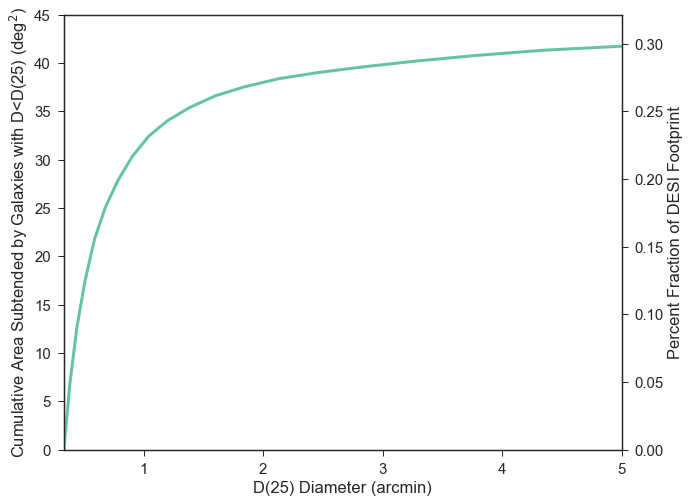

In [73]:
xlim = (20/60, 5)
ylim = (0.0, 45.0)
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(d25cut, totarea, lw=3)
ax1.set_ylabel(r'Cumulative Area Subtended by Galaxies with D<D(25) (deg$^{2}$)')
ax1.set_xlabel('D(25) Diameter (arcmin)')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax2 = ax1.twinx()
ax2.set_ylabel('Percent Fraction of DESI Footprint')
ax2.set_ylim(0, 100 * ylim[1] / 14000)

(array([8.683e+03, 1.738e+03, 1.201e+03, 4.540e+02, 1.430e+02, 4.100e+01,
        1.500e+01, 8.000e+00, 3.000e+00, 2.000e+00]),
 array([ 0.        ,  9.74033349, 19.48066698, 29.22100047, 38.96133396,
        48.70166745, 58.44200094, 68.18233443, 77.92266792, 87.66300141,
        97.4033349 ]),
 <a list of 10 Patch objects>)

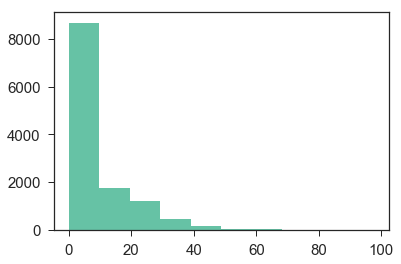

In [72]:
nside = 32
npix = hp.nside2npix(nside)
bin_area = hp.nside2pixarea(nside, degrees=True)
pix = LSLGA.misc.radec2pix(nside, ss['RA'], ss['DEC'])
dens = np.bincount(pix, minlength=npix) / bin_area